# Dignitas U.S. PayPal Donations Analytics

In [9]:
import pandas as pd

df = pd.read_excel('./data/PayPal Donations All.xlsx', sheet_name='Sheet1')
df = df.fillna('Not specified')
# print whole sheet data
df[['Date', 'Type', 'Net', 'Country']]

,Date,Net,Country
0,2023-02-27,9.70,United States
1,2023-03-03,48.50,United States
2,2023-03-06,24.25,United States
3,2023-03-09,3246.41,United Kingdom
4,2023-03-10,10.11,Not specified
...,...,...,...
185,2023-04-30,96.02,Poland
186,2023-05-01,10.10,United States
187,2023-05-01,4.34,United Kingdom
188,2023-05-01,15.00,United States


## Totally raised

In [18]:
df['Net'].sum()

23604.61

## Median donation amount

In [44]:
round(df['Net'].median(), 2)

48.86

## Median daily donation amount

In [60]:
round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2)

158.84

## Donations by date

<Axes: xlabel='Date'>

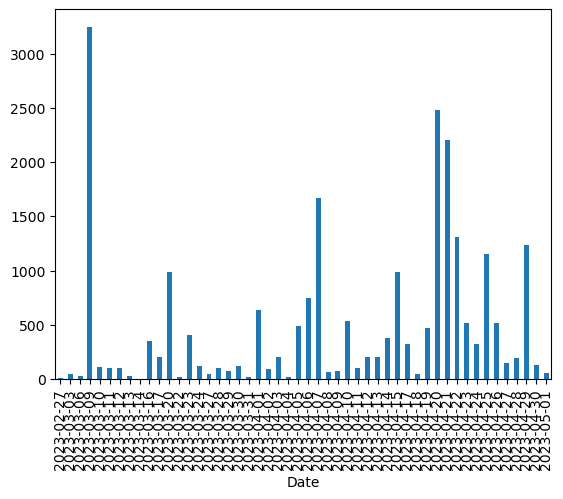

In [17]:
df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar')

## Contributions by country

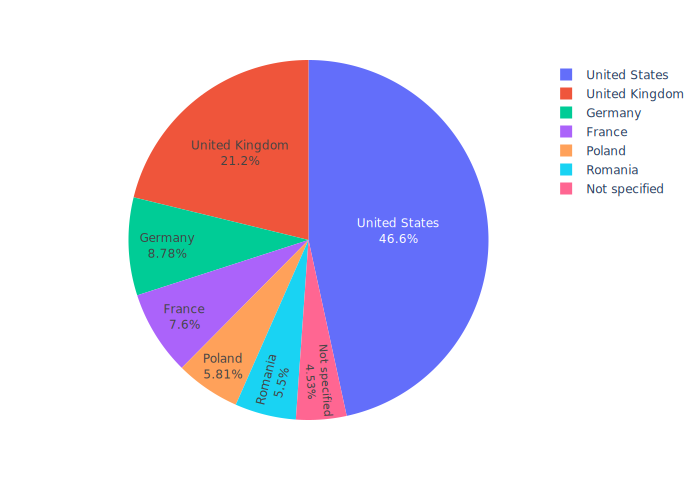

In [128]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='svg')

## Weekly amounts

<Axes: xlabel='Date'>

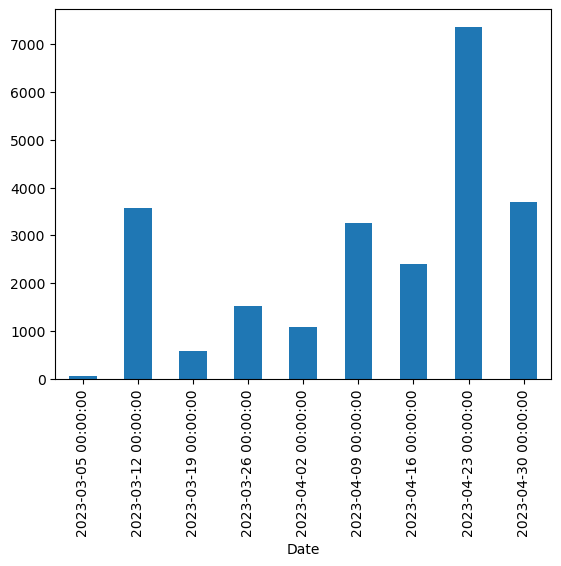

In [25]:
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()
df_w = df_w[:-1]
df_w.plot(kind = 'bar')

## Cumulatively raised

<Axes: xlabel='Date'>

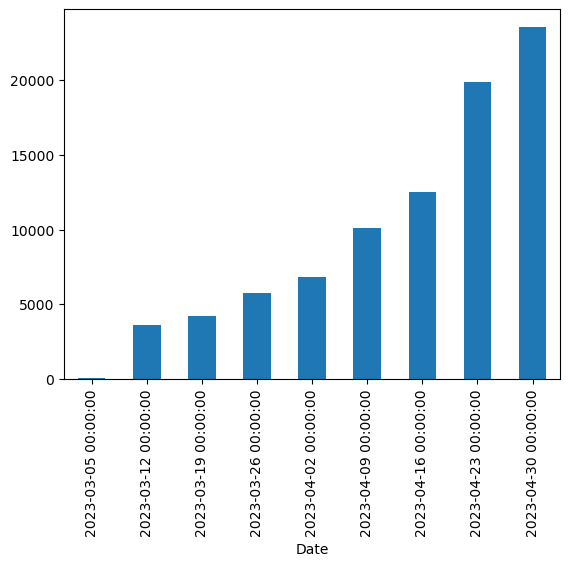

In [24]:
df_w.cumsum().plot(kind = 'bar')

## We are all united

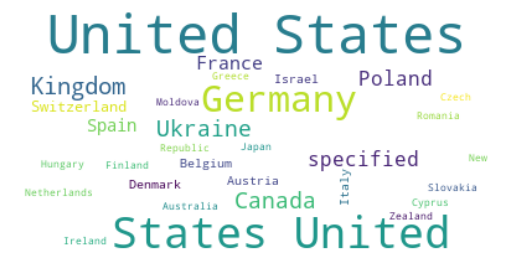

In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in df['Country'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
#plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# And we have regular supporters with subscription amount

In [16]:
df.loc[df['Type'] == 'Subscription Payment', 'Net'].sum().round(2)

204.31